## Importing the Necessary Packages

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
from xgboost import XGBRegressor
import seaborn as sns
sns.set()

## Loading Data

In [54]:
raw_data = pd.read_csv('1.05 STATION HIRONPOINT.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2017,1,1,101.52,14.48,25.83,0.00,3.45,68.81,15.99,12.643,5.516,2.80,0.73
1,2017,1,2,101.51,14.08,26.18,0.00,4.23,68.69,15.46,12.644,5.387,2.68,0.82
2,2017,1,3,101.44,15.01,26.30,0.08,4.81,73.44,15.34,12.713,5.232,2.66,0.80
3,2017,1,4,101.34,14.66,26.21,0.04,4.66,72.94,15.57,12.954,5.149,2.56,0.83
4,2017,1,5,101.32,13.23,25.94,0.02,4.98,69.50,14.65,12.956,5.065,2.50,0.86


## Handling Null Values

In [55]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 1
LOW                  0
dtype: int64

In [56]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2018.500000,6.526027,15.728767,100.793432,21.368678,29.565158,9.313692,5.216904,77.86539,23.058390,10.271556,11.062897,2.945329,0.845911
std,1.118417,3.449033,8.806059,0.576262,5.736076,3.091541,18.968023,1.587857,11.48626,5.084257,3.525952,5.797917,0.374364,0.421845
min,2017.000000,1.000000,1.000000,98.970000,2.780000,15.530000,0.000000,1.930000,38.31000,9.740000,3.793000,2.080000,0.090000,-0.240000
25%,2017.750000,4.000000,8.000000,100.327500,16.997500,28.057500,0.000000,4.260000,69.94000,19.165000,6.828750,5.176250,2.720000,0.570000
50%,2018.500000,7.000000,16.000000,100.830000,23.730000,29.950000,1.545000,4.900000,79.38000,25.560000,11.151000,11.898500,2.970000,0.830000
75%,2019.250000,10.000000,23.000000,101.290000,26.210000,31.490000,11.242500,5.740000,87.76500,27.150000,13.462000,16.883000,3.220000,1.072500
max,2020.000000,12.000000,31.000000,101.920000,28.010000,36.080000,224.520000,22.300000,94.62000,28.830000,15.071000,19.062000,3.790000,3.060000


## Distribution Check and Dealing With Outliers

In [57]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


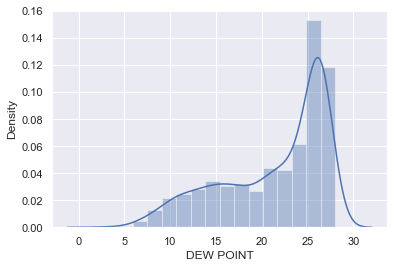

In [58]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


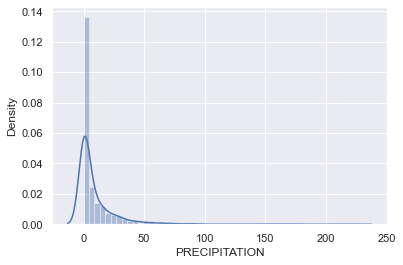

In [59]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


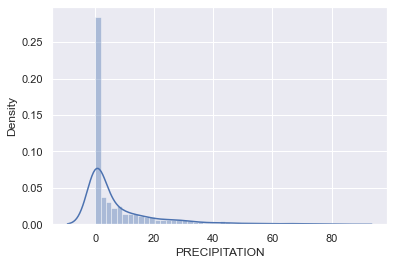

In [60]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [61]:
data_cleaned = data_1.reset_index(drop=True)

In [62]:
data_cleaned = data_cleaned.drop(['HIGH'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,LOW
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,2018.505882,6.507958,15.725952,100.799723,21.318443,29.575716,8.022069,5.189889,77.713896,23.021232,10.297266,11.012576,0.844298
std,1.118096,3.457614,8.817772,0.575111,5.743869,3.104845,13.398900,1.558170,11.448102,5.096190,3.530753,5.803321,0.422188
min,2017.000000,1.000000,1.000000,98.970000,2.780000,15.530000,0.000000,1.930000,38.310000,9.740000,3.793000,2.080000,-0.240000
25%,2018.000000,4.000000,8.000000,100.330000,16.980000,28.060000,0.000000,4.250000,69.810000,19.100000,6.783000,5.114000,0.570000
50%,2019.000000,7.000000,16.000000,100.840000,23.630000,29.980000,1.420000,4.880000,79.190000,25.510000,11.207000,11.766000,0.830000
75%,2020.000000,10.000000,23.000000,101.290000,26.190000,31.510000,10.470000,5.720000,87.620000,27.150000,13.469000,16.879000,1.070000
max,2020.000000,12.000000,31.000000,101.920000,28.010000,36.080000,84.240000,22.300000,94.620000,28.830000,15.071000,19.062000,3.060000


## Setting Targets(Labels) and Inputs

In [63]:
targets = data_cleaned['LOW']
inputs = data_cleaned.drop(['LOW'],axis=1)

## Polynomial Regression

### Scaling the data

In [64]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=22)

### Model

In [66]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

### Training

In [67]:
reg_pol = LinearRegression()
reg_pol.fit(x_train_trans,y_train)
Train_score_PR = reg_pol.score(x_train_trans,y_train)
print("Training Score: ",Train_score_PR)

Training Score:  0.3484922402897983


### Testing

In [68]:
y_pred_pol = reg_pol.predict(x_test_trans)

In [69]:
Test_score_PR = r2_score(y_test,y_pred_pol)
print("Testing Score: ",Test_score_PR)

Testing Score:  0.10224258782463169


In [70]:
mse = mean_squared_error(y_test, y_pred_pol)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.16622152027134307
RMSE : 0.08311076013567154


### Visulizing Predictions

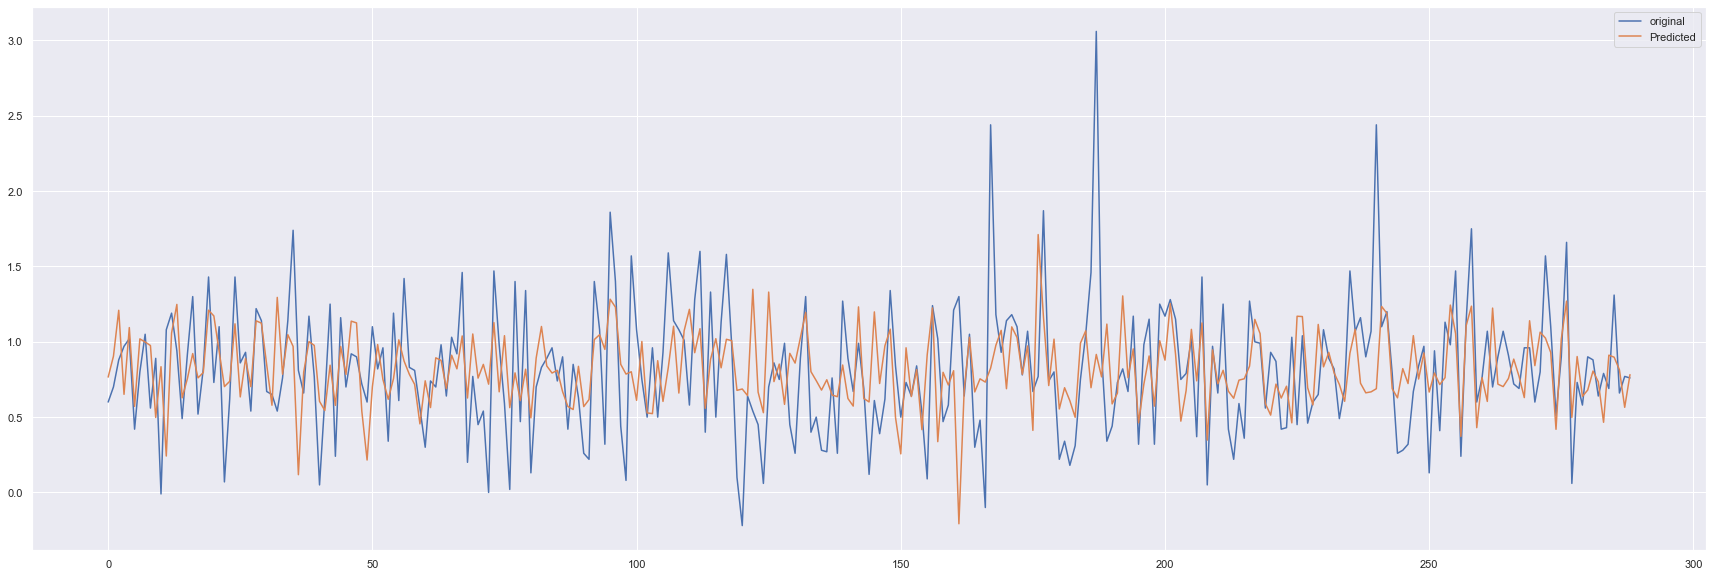

In [71]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_pol, label="Predicted")
plt.legend()
plt.show()

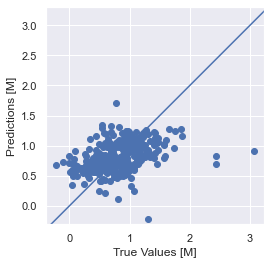

In [72]:
y_pred_pol = reg_pol.predict(x_test_trans).flatten()
plt.scatter(y_test, y_pred_pol)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Support Vector Regression

### Scaling the data

In [73]:
df_svr = data_cleaned
scaler=MinMaxScaler()
scaler.fit(inputs)
inputs_scaled_SVR = scaler.transform(inputs)

### Train-Test Split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled_SVR, targets, test_size=0.2, random_state=22)

### Model and Training

In [75]:
svr = SVR(kernel='rbf',C=70,epsilon=0.1)
svr.fit(x_train,y_train)
Train_score_SVR = svr.score(x_train,y_train)
print("Training Score: ",Train_score_SVR)

Training Score:  0.616220568860788


### Testing

In [76]:
y_pred_svr = svr.predict(x_test)

In [77]:
Test_score_SVR = r2_score(y_test,y_pred_svr)
print("Testing Score: ",Test_score_SVR)

Testing Score:  0.3033344949987411


In [78]:
mse = mean_squared_error(y_test, y_pred_svr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.12898896493799333
RMSE : 0.06449448246899667


### Visualizing Predictions

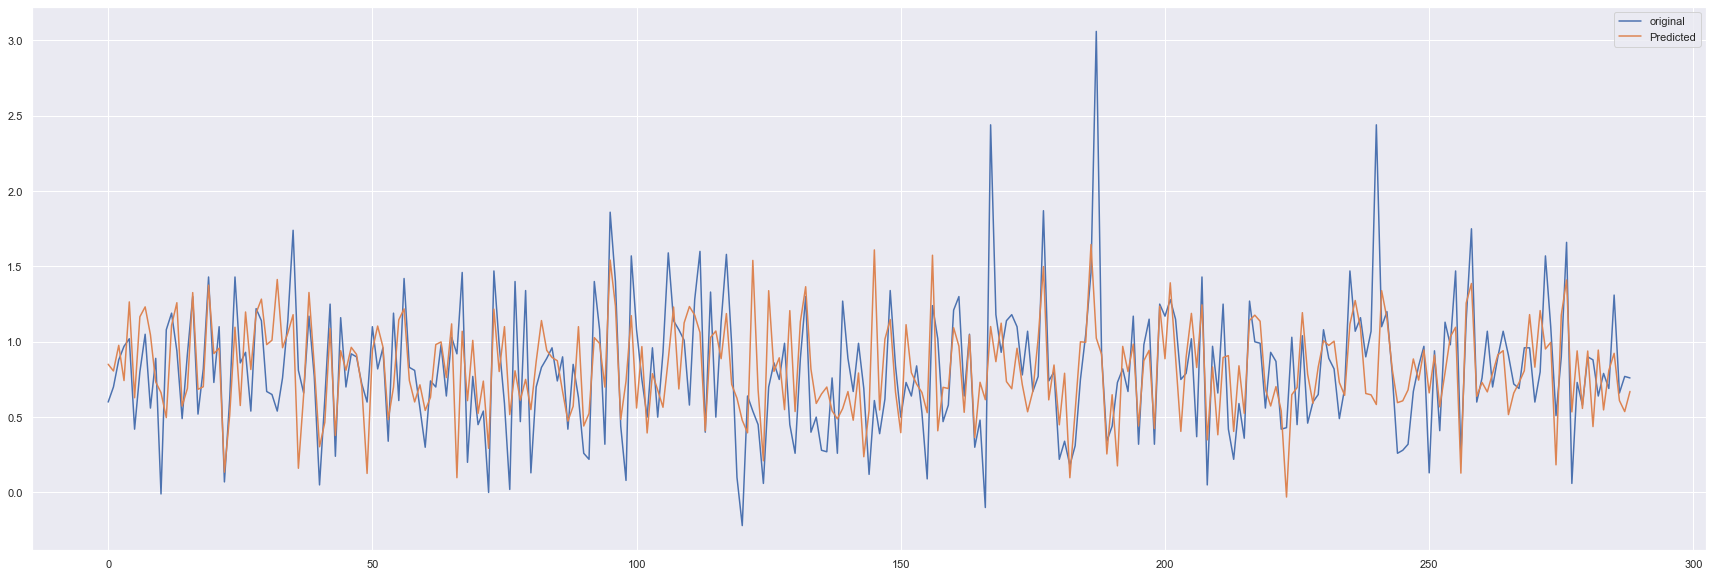

In [79]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_svr, label="Predicted")
plt.legend()
plt.show()

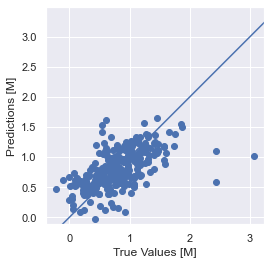

In [80]:
y_pred_svr = svr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_svr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## XGB Regressor

### Train-Test Split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.15, random_state=22)

### Model

In [82]:
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


### Training

In [83]:
xgbr.fit(x_train,y_train)
Train_score_XGB = xgbr.score(x_train,y_train)
print("Training Score: ",Train_score_XGB)

Training Score:  0.9967461110558018


### Testing

In [84]:
y_pred_xgbr = xgbr.predict(x_test)
Test_score_XGB =  r2_score(y_test,y_pred_xgbr)
print("Testing Score: ",Test_score_XGB)

Testing Score:  0.43978334565029


In [85]:
mse = mean_squared_error(y_test, y_pred_xgbr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.11023927596492684
RMSE : 0.05511963798246342


### Visualizing Predictions

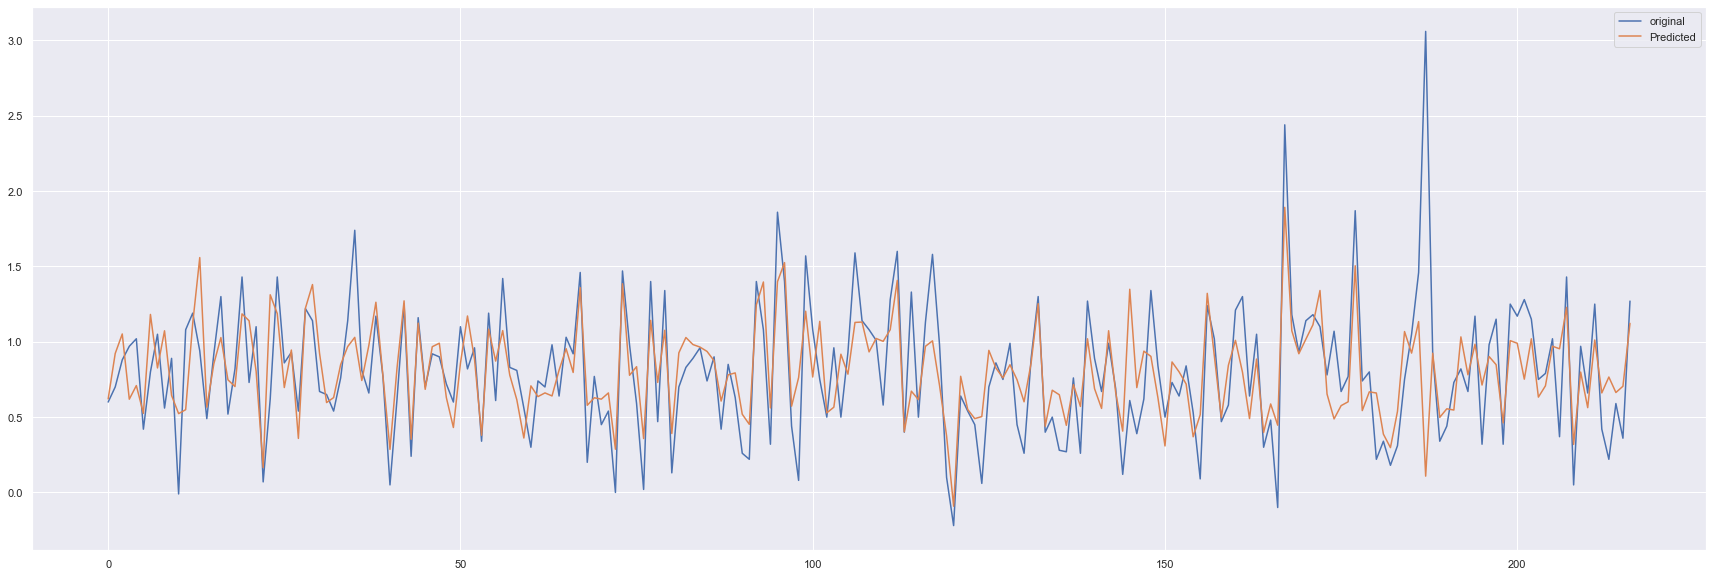

In [86]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_xgbr, label="Predicted")
plt.legend()
plt.show()

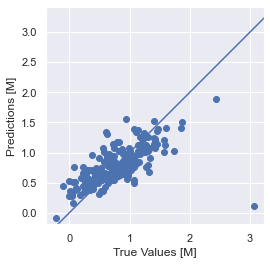

In [87]:
y_pred_xgbr = xgbr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_xgbr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()

## Random Forest Regression Model

### Train-Test Split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=22)

### Model

In [89]:
rfr = RandomForestRegressor(n_estimators=1000,random_state=0)

### Training

In [90]:
rfr.fit(x_train,y_train)
Train_score_RFR = rfr.score(x_train,y_train)
print("Training Score: ",Train_score_RFR)

Training Score:  0.9278894713723747


### Testing

In [91]:
y_pred_rfr = rfr.predict(x_test)
Test_score_RFR =  r2_score(y_test,y_pred_rfr)
print("Testing Score: ",Test_score_RFR)

Testing Score:  0.4540418800072694


In [92]:
mse = mean_squared_error(y_test, y_pred_rfr)
print("MSE :",mse)
print("RMSE :",mse*(1/2.0))

MSE : 0.10108520127923921
RMSE : 0.05054260063961961


### Visualizing Predictions

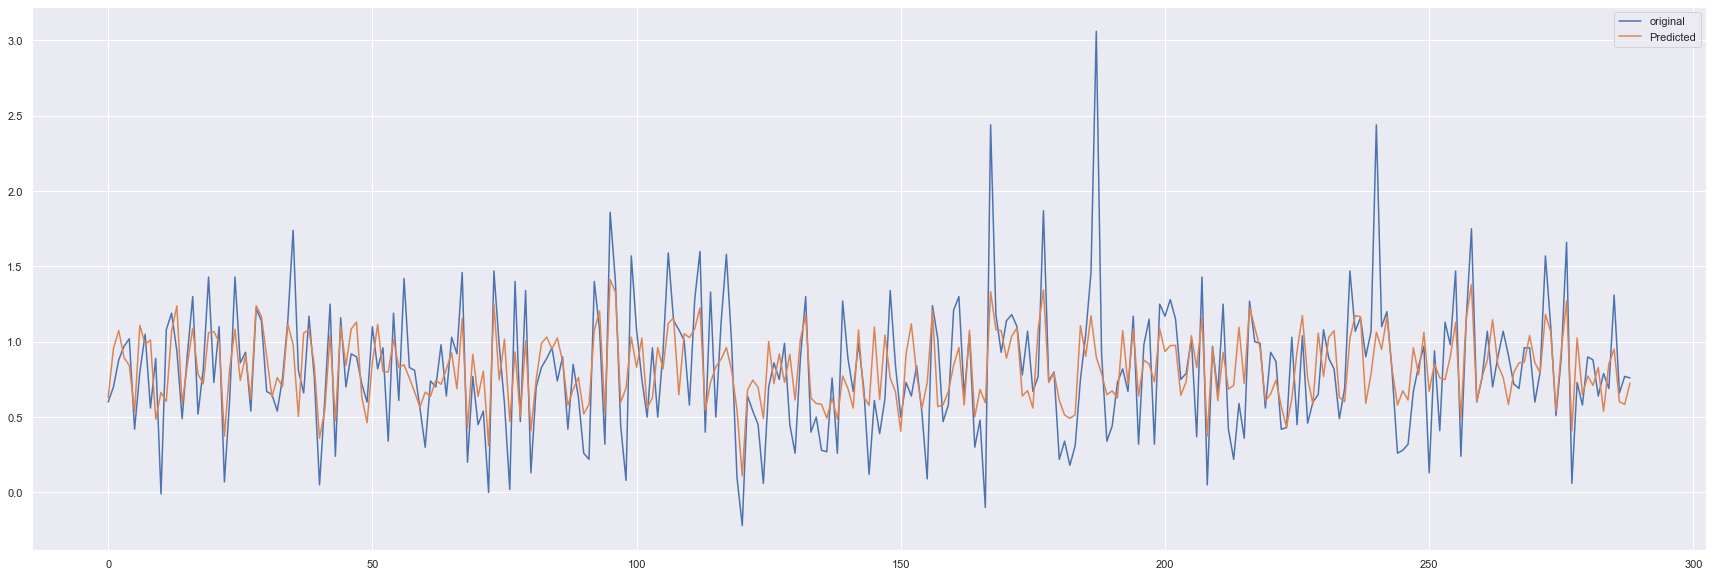

In [93]:
x_ax = range(len(y_test))
plt.figure(figsize=(30,10))
plt.plot(x_ax, y_test,label="original")
plt.plot(x_ax, y_pred_rfr, label="Predicted")
plt.legend()
plt.show()

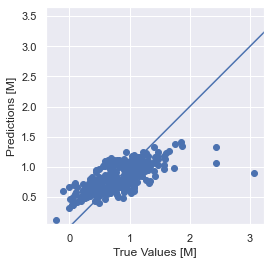

In [94]:
y_pred_rfr = rfr.predict(x_test).flatten()
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')

_ = plt.plot([-100, 100], [-100, 100])
plt.show()